# Introduction to NLP, Entity Recognition, Pointwise Mutual Information

### Author: Ruchita Nagare

### [Section 1] Basic Text Analysis

This section involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.



In [30]:
import glob


for i in (glob.glob('./HW1_Dataset/*.txt')):
    text = open(i, encoding='utf8').read()
    print(i + " " + str(len(text)))

./HW1_Dataset\A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (265).txt 177758
./HW1_Dataset\A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918
./HW1_Dataset\A Modest Proposal by Jonathan Swift (233).txt 38966
./HW1_Dataset\A Study in Scarlet by Arthur Conan Doyle (163).txt 262340
./HW1_Dataset\A Tale of Two Cities by Charles Dickens (425).txt 776702
./HW1_Dataset\Adventures of Huckleberry Finn by Mark Twain (401).txt 593962
./HW1_Dataset\Alice in Wonderland by Lewis Carroll and Alice Gerstenberg (126).txt 104079
./HW1_Dataset\Alice's Adventures in Wonderland by Lewis Carroll (564).txt 163817
./HW1_Dataset\Anne of Green Gables by L. M.  Montgomery (114).txt 580635
./HW1_Dataset\Autobiography of Benjamin Franklin by Benjamin Franklin (247).txt 458600
./HW1_Dataset\Beowulf An Anglo-Saxon Epic Poem (403).txt 292953
./HW1_Dataset\Beyond Good and Evil by Friedrich Wilhelm Nietzsche (120).txt 402273
./HW1_Dataset\Candide by Voltaire (1

Printing out the top 15 longest books 

In [31]:
from operator import itemgetter

dict_temp = {}

for i in (glob.glob('./HW1_Dataset/*.txt')):
    text = open(i, encoding='utf8').read()
    dict_temp[i] = len(text)

sorted_dict_temp = sorted(dict_temp.items(),
                                  reverse=True,
                                  key=itemgetter(1))

for idx, item in enumerate(sorted_dict_temp[:15], start =1):
    print(idx, '.', str(item[1]), item[0])

1 . 5465100 ./HW1_Dataset\The Complete Works of William Shakespeare by William Shakespeare (132).txt
2 . 4351846 ./HW1_Dataset\The King James Version of the Bible (132).txt
3 . 3254333 ./HW1_Dataset\Les Mise╠ürables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4 . 3227580 ./HW1_Dataset\War and Peace by graf Leo Tolstoy (251).txt
5 . 3033575 ./HW1_Dataset\Essays of Michel de Montaigne ΓÇö Complete by Michel de Montaigne (205).txt
6 . 2643849 ./HW1_Dataset\The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7 . 1534140 ./HW1_Dataset\Ulysses by James Joyce (282).txt
8 . 1378627 ./HW1_Dataset\My Secret Life, Volumes I. to III. by Anonymous (157).txt
9 . 1238569 ./HW1_Dataset\Moby Dick; Or, The Whale by Herman Melville (413).txt
10 . 1231784 ./HW1_Dataset\Leviathan by Thomas Hobbes (417).txt
11 . 1214387 ./HW1_Dataset\The Republic by Plato (246).txt
12 . 1200021 ./HW1_Dataset\The History of the Peloponnesian War by Thucydides (122).txt
13 . 1175588 ./HW1_Dataset\The 

**Subpart iii.** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

In [32]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


In [41]:
total_batches = 0
for i in (glob.glob('./HW1_Dataset/*.txt')):
    text = open(i, encoding='utf8').read()
    total_batches += len(split_into_batches(text, 10000))
    
print("Total number of batches: " , total_batches)

Total number of batches:  1246


**(b)** Now we will finally use spaCy.

Build a term frequency (raw counts) table that is for all 100 books. 

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphanumeric.


After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. 

In [6]:
import spacy
import re
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
from collections import Counter
from tqdm.notebook import tqdm_noteboo
k
histogram = Counter()

for i in tqdm_notebook(glob.glob('./HW1_Dataset/*.txt')):
    text = open(i, encoding='utf8').read()
    one_book_batches = split_into_batches(text, 10000)
    for each_batch in one_book_batches:
        processed_batches = nlp(each_batch)
        for token in processed_batches:
            lemma = token.lemma_
            if re.match('[a-zA-Z0-9]+$', lemma):
                histogram[lemma] += 1
        
   
sorted_lemma_count_pairs = histogram.most_common()
idx = 1
for lemma, count in sorted_lemma_count_pairs[:50]:
    print("Rank ", idx , "-", lemma, ":", count)
    idx+=1
    
  

  0%|          | 0/100 [00:00<?, ?it/s]

Rank  1 - the : 702301
Rank  2 - be : 436045
Rank  3 - and : 435432
Rank  4 - of : 386343
Rank  5 - to : 324345
Rank  6 - I : 254952
Rank  7 - a : 232719
Rank  8 - in : 204234
Rank  9 - he : 193507
Rank  10 - that : 158935
Rank  11 - have : 158148
Rank  12 - it : 135414
Rank  13 - not : 112312
Rank  14 - his : 108537
Rank  15 - you : 105094
Rank  16 - with : 101226
Rank  17 - they : 96202
Rank  18 - for : 95261
Rank  19 - as : 90714
Rank  20 - she : 78940
Rank  21 - but : 75598
Rank  22 - my : 74019
Rank  23 - do : 68716
Rank  24 - at : 64947
Rank  25 - on : 62798
Rank  26 - this : 61222
Rank  27 - by : 61168
Rank  28 - we : 60268
Rank  29 - which : 58727
Rank  30 - all : 58724
Rank  31 - say : 58281
Rank  32 - from : 50095
Rank  33 - so : 47925
Rank  34 - or : 47806
Rank  35 - her : 42440
Rank  36 - one : 41089
Rank  37 - man : 39734
Rank  38 - no : 38422
Rank  39 - their : 38393
Rank  40 - what : 37759
Rank  41 - there : 37187
Rank  42 - will : 36737
Rank  43 - if : 34897
Rank  44 - 

**(c)** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

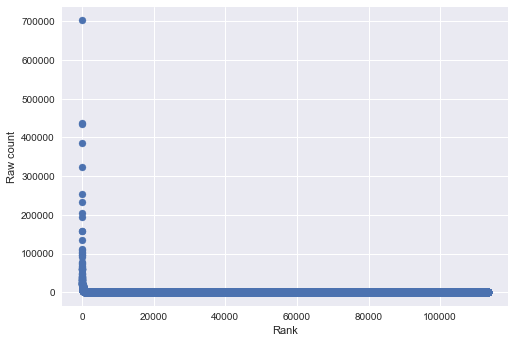

In [34]:
# Raw scatter plot

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

lemmas = [lemma for lemma, count in sorted_lemma_count_pairs]
total_ranks = len(lemmas)
counts = [count for lemma, count in sorted_lemma_count_pairs]
plt.scatter(range(total_ranks), counts)
# #plt.xticks(0,total_ranks, 3000)
# plt.xlim(0,1000)
# plt.xticks(range(0, total_ranks, 20000), )
# plt.yticks(range(0,counts, 20000))
plt.xlabel('Rank')
plt.ylabel('Raw count')
plt.show()

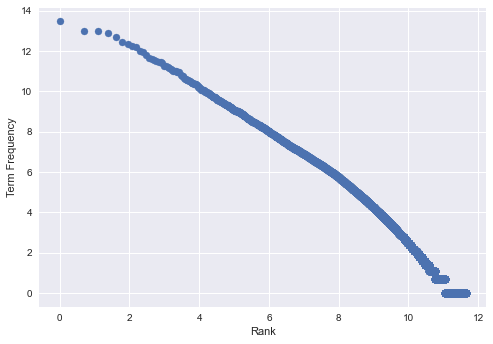

In [35]:
# Log-log plot

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

lemmas = [lemma for lemma, count in sorted_lemma_count_pairs]
total_ranks = np.log(range(1, len(lemmas)+1))
counts_log = np.log([count for lemma, count in sorted_lemma_count_pairs])
plt.scatter(total_ranks, counts_log)
# #plt.xticks(0,total_ranks, 3000)
# plt.xlim(0,1000)
# plt.xticks(range(0, total_ranks, 20000), )
# plt.yticks(range(0,counts, 20000))
plt.xlabel('Rank')
plt.ylabel('Term Frequency')
plt.show()

Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.


***By simply looking at the above log-log plot we can infer that as the rank increases, the term frequency of the corresponding rank decreases. Furthermore, we can see that the term frequency and rank are inversely proportional, and in alignment with the power law which defines the realtionship between term frequency and rank approximately as 𝑓(𝑟)=𝑐𝑟−1 , where 𝑓(𝑟). The term frequency drecreases in a proportion(approximately by a constant c).***

***Thus,the above log-log plot is consistent witht the power law.***

**Subpart ii.** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words; thus what remains in the bag are actually alphanumeric lemmas). Lets see what is the probability of drawing one of the 4 most frequent alphanumeric lemmas? What is the probability of drawing one of the 50 most frequent alphanumeric lemmas?

In [36]:
print('Probability of drawing one of the 4 most frequent alphanumeric lemmas: ')
print(sum([count for lemma,count in sorted_lemma_count_pairs[:4]])/(sum([count for lemma,count in sorted_lemma_count_pairs])))

print('Probability of drawing one of the 50 most frequent alphanumeric lemmas: ')
print(sum([count for lemma,count in sorted_lemma_count_pairs[:50]])/(sum([count for lemma,count in sorted_lemma_count_pairs])))

Probability of drawing one of the 4 most frequent alphanumeric lemmas: 
0.16191255494051857
Probability of drawing one of the 50 most frequent alphanumeric lemmas: 
0.4818741410800735


**Subpart iii** What proportion of the alphanumeric lemmas occur only once? What proportion of the alphanumeric lemmas occur fewer than 10 times?

In [37]:
print("Occur only once: ")
only_once = [count for lemma, count in sorted_lemma_count_pairs if count ==1]
print(len(only_once)/len(counts))

print("Occur fewer than 10 times: ")
fewer_than_10 = [count for lemma, count in sorted_lemma_count_pairs if count < 10]
print(len(fewer_than_10)/len(counts))

Occur only once: 
0.44721756768674487
Occur fewer than 10 times: 
0.7822647499779521


### [Section 2] Entity Recognition and Pointwise Mutual Information (PMI)
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

**(a)** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label.

Counter({'CARDINAL': 58101, 'ORG': 45214, 'DATE': 36109, 'GPE': 21289, 'PERSON': 11472, 'QUANTITY': 7328, 'NORP': 6224, 'MONEY': 4964, 'LOC': 1570, 'ORDINAL': 1097, 'TIME': 989, 'PRODUCT': 641, 'LAW': 426, 'FAC': 333, 'WORK_OF_ART': 266, 'EVENT': 256, 'PERCENT': 84, 'LANGUAGE': 17})


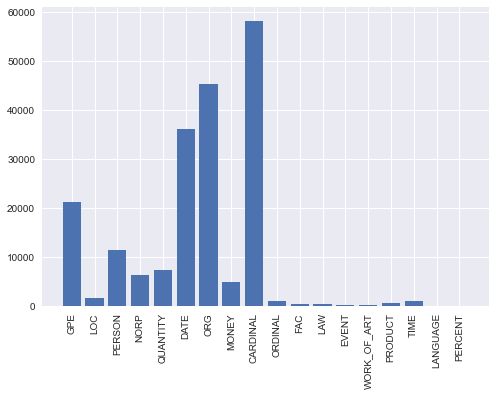

In [38]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser'])
reuters_fileids = reuters.fileids() 
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()


for article in reuters_nlp:
    for entity in article.ents:
        label_counter[entity.label_] += 1

print(label_counter)
        
x = label_counter.keys()
y = label_counter.values()

plt.bar(x, y)
plt.xticks(rotation = 90)
plt.show()

**(b)** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. 

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [39]:

all_articles_unique_orgs = set([entity.orth_.lower() for article in reuters_nlp for entity in article.ents if entity.label_ == 'ORG'])
all_articles_unique_gpes = set([entity.orth_.lower() for article in reuters_nlp for entity in article.ents if entity.label_ == 'GPE'])

orgs_counter = Counter()

for article in tqdm_notebook(reuters_nlp):
    one_article_unique_orgs_counter = Counter()
    for entity in article.ents:
        if entity.label_ == 'ORG':
            one_article_unique_orgs_counter[entity.orth_.lower()] += 1
        else:
            continue
    one_article_unique_orgs = list(one_article_unique_orgs_counter.keys())
    for one_article_org in one_article_unique_orgs:
        if one_article_org in all_articles_unique_orgs:
            orgs_counter[one_article_org]+=1
            
print("Top 10 most frequently occurring entities with label ORG: \n")
for x,y in orgs_counter.most_common(10):
    print(x,':', y)
         
gpes_counter = Counter()

for article in tqdm_notebook(reuters_nlp):
    one_article_unique_gpes_counter = Counter()
    for entity in article.ents:
        if entity.label_ == 'GPE':
            one_article_unique_gpes_counter[entity.orth_.lower()] += 1
        else:
            continue
    one_article_unique_gpes = list(one_article_unique_gpes_counter.keys())
    for one_article_gpe in one_article_unique_gpes:
        if one_article_gpe in all_articles_unique_gpes:
            gpes_counter[one_article_gpe]+=1
            
print("Top 10 most frequently occurring entities with label GPE: \n")
for x,y in gpes_counter.most_common(10):
    print(x,':', y)

  0%|          | 0/10788 [00:00<?, ?it/s]

Top 10 most frequently occurring entities with label ORG: 

reuters : 447
the securities and exchange commission : 249
ec : 237
treasury : 222
fed : 209
usda : 181
the u.s. agriculture department : 168
the bank of england : 142
congress : 136
opec : 125


  0%|          | 0/10788 [00:00<?, ?it/s]

Top 10 most frequently occurring entities with label GPE: 

u.s. : 1674
japan : 575
the united states : 381
u.k. : 305
canada : 304
new york : 256
west germany : 237
washington : 233
london : 211
brazil : 195


**(c)** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come?

In [40]:
np.seterr(divide='ignore')
#probability of opec
prob_opec = (orgs_counter['opec']/len(reuters_nlp))

#probability of each gpe entity occuring independently
prob_gpe_dict = {}

for gpe_x in gpes_counter:
    prob_gpe_x = (gpes_counter[gpe_x]/len(reuters_nlp))
    prob_gpe_dict[gpe_x] = prob_gpe_x
    
#probability of a gpe and opec occuring together
both_dict = Counter()
prob_both = {}

for article in tqdm_notebook(reuters_nlp):
    each_article_unique_gpe = set([entity.orth_.lower() for entity in article.ents if entity.label_ == 'GPE'])
    each_article_unique_org = set([entity.orth_.lower() for entity in article.ents if entity.label_ == 'ORG'])
    for gpe in gpes_counter.keys():
        if (gpe in each_article_unique_gpe) and ('opec' in each_article_unique_org):
            both_dict[gpe]+=1
            
for each_pair in both_dict.keys():
    prob_both[each_pair] = (both_dict[each_pair]/len(reuters_nlp))
  

for x in gpes_counter.keys():
    if x not in prob_both.keys():
        prob_both[x] = 0
        

#calculating approximate pmi
pmi_dict = {}

#displaying just the rank
for gpe in prob_gpe_dict:
    pmi_dict[gpe] = np.log2(prob_both[gpe]/(prob_gpe_dict[gpe]*prob_opec))    
final_list = sorted(pmi_dict.items(), key = lambda x: x[1], reverse = True)
for idx,x in enumerate(range(50), start =1):
    print(idx, final_list[x][0], ':', final_list[x][1])

  0%|          | 0/10788 [00:00<?, ?it/s]

1 lajous : 6.431355521573517
2 duri : 6.431355521573517
3 petromin : 6.431355521573517
4 september norway's : 6.431355521573517
5 turben : 6.431355521573517
6 emirates : 6.431355521573517
7 the lake charles : 6.431355521573517
8 bethesda : 6.431355521573517
9 east room : 6.431355521573517
10 rosenberg : 6.431355521573517
11 gabon : 6.431355521573517
12 opecna : 6.431355521573517
13 venezuela"s : 6.431355521573517
14 el salado : 6.431355521573517
15 yanbu : 6.431355521573517
16 jubail : 6.431355521573517
17 napo : 6.431355521573517
18 napo province : 6.431355521573517
19 tripoli : 6.431355521573517
20 saudi arabia's king : 6.431355521573517
21 doha : 6.431355521573517
22 guayaquil : 6.431355521573517
23 neutral zone : 6.431355521573517
24 redoglia : 6.431355521573517
25 suharto : 6.431355521573517
26 materialy : 6.431355521573517
27 hartley : 6.431355521573517
28 vienna : 6.196890267936493
29 riyadh : 6.109427426686154
30 saudi arabia's : 5.890787140210814
31 quito : 5.846393020852361
3

### Some inferences:

- The top 50 GPE entities co-occuring with 'opec' ORG are mostly middle eastern locations or locations that are sources of oil/petroleum. 
- OPEC stands for Organization of the Petroleum Exporting Countries and thus the above mentioned GPEs are bound to co-occur with opec entity.
- We can also notice that Vienna is also on this list which is the headquaters of OPEC.
- This tells us that the locations mentioned above do co-occur with opec for valid and unsurprising reasons.

- It can also be noticed that the top 10 most frequently occurring entities with label GPE across all the articles do not quite co-occur with opec. 
- The GPEs that co-occur with opec do not occur very frequently accross all the articles.
- Thus we can say that the above mentioned entities with lable GPE are more likely to occur with opec entity than ocurring independently.